In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
annotations_file_path = './data/annotations.json'

In [3]:
# Read annotations file
with open(annotations_file_path, 'r') as file: #open the json file
    dataset = json.load(file) # read and parse the json file

In [4]:
for x in dataset:
    print(x)

info
images
annotations
scene_annotations
licenses
categories
scene_categories


In [5]:
categories = dataset['categories']
annotations = dataset['annotations']
images = dataset['images']
print(f"There are {len(categories)} categories")
print(f"There are {len(annotations)} annotations")
print(f"There are {len(images)} images")

There are 60 categories
There are 4784 annotations
There are 1500 images


In [6]:
print(annotations[0].keys())
print(annotations[0])

dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd'])
{'id': 1, 'image_id': 0, 'category_id': 6, 'segmentation': [[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0, 549.0, 1127.0, 538.0, 1089.0, 519.0, 1043.0, 517.0, 1005.0, 523.0, 964.0, 529.0, 945.0, 520.0, 896.0, 525.0, 862.0, 536.0, 821.0, 554.0, 769.0, 577.0, 727.0, 595.0, 678.0, 596.0, 585.0, 588.0, 346.0, 581.0, 328.0, 569.0, 306.0, 570.0, 276.0, 576.0, 224.0, 560.0, 205.0, 564.0, 170.0, 578.0, 154.0, 608.0, 136.0, 649.0, 127.0, 688.0, 127.0, 726.0, 129.0, 759.0, 141.0, 784.0, 153.0, 792.0, 177.0, 788.0, 193.0, 782.0, 209.0, 792.0, 238.0, 802.0, 271.0, 802.0, 294.0, 791.0, 319.0, 789.0, 360.0, 794.0, 395.0, 810.0, 529.0, 819.0, 609.0, 841.0, 675.0, 882.0, 728.0, 916.0, 781.0, 928.0, 802.0, 938.0, 834.0, 940.0, 856.0, 939.0, 873.0, 938.0, 884.0, 944.0, 901.0, 951.0, 917.0, 956.0, 942.0, 960.0, 972.0, 964.0, 1013.0, 959.0, 1036.0, 952.0, 1081.0, 952.0, 1106.0, 934.0, 1163.0, 935.0, 1174.0, 949.0, 1209.

In [7]:
print(images[0].keys())

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured', 'flickr_640_url'])


In [8]:
for x in categories:
    print(x)

{'supercategory': 'Aluminium foil', 'id': 0, 'name': 'Aluminium foil'}
{'supercategory': 'Battery', 'id': 1, 'name': 'Battery'}
{'supercategory': 'Blister pack', 'id': 2, 'name': 'Aluminium blister pack'}
{'supercategory': 'Blister pack', 'id': 3, 'name': 'Carded blister pack'}
{'supercategory': 'Bottle', 'id': 4, 'name': 'Other plastic bottle'}
{'supercategory': 'Bottle', 'id': 5, 'name': 'Clear plastic bottle'}
{'supercategory': 'Bottle', 'id': 6, 'name': 'Glass bottle'}
{'supercategory': 'Bottle cap', 'id': 7, 'name': 'Plastic bottle cap'}
{'supercategory': 'Bottle cap', 'id': 8, 'name': 'Metal bottle cap'}
{'supercategory': 'Broken glass', 'id': 9, 'name': 'Broken glass'}
{'supercategory': 'Can', 'id': 10, 'name': 'Food Can'}
{'supercategory': 'Can', 'id': 11, 'name': 'Aerosol'}
{'supercategory': 'Can', 'id': 12, 'name': 'Drink can'}
{'supercategory': 'Carton', 'id': 13, 'name': 'Toilet tube'}
{'supercategory': 'Carton', 'id': 14, 'name': 'Other carton'}
{'supercategory': 'Carton',

In [9]:
category_names = []         #Initialization of categories list
supercategory_names = []    #Initialization of categories list
supercategory_IDs = {}      #Initialization of dictionnary to create IDs for supercategories
last_supercategory = ''     #Variable to memorize last supercategory seen
supercategory_ID = 0        #Initialize ID for supercategories at zero
for category in categories:
    category_names.append(category['name'])                                 #append category to categories list
    if category['supercategory'] != last_supercategory:                     
        supercategory_names.append(category['supercategory'])               #Adding supercategory if not already seen
        supercategory_IDs[category['supercategory']] = supercategory_ID     #Adding new supercategory and its ID to dict
        last_supercategory = category['supercategory']                      #Update last supercategory name
        supercategory_ID += 1                                               #Increment ID

In [10]:
# Count annotations in each categories
categories_count = np.zeros(len(categories),dtype=int)
for annotation in annotations:
    categories_count[annotation['category_id']] += 1
#create dataframe with category names and number of annotations
df_categories = pd.DataFrame({'Categories': category_names, 'Number of annotations': categories_count})
df_categories

,Categories,Number of annotations
0,Aluminium foil,62
1,Battery,2
2,Aluminium blister pack,6
3,Carded blister pack,1
4,Other plastic bottle,50
5,Clear plastic bottle,285
6,Glass bottle,104
7,Plastic bottle cap,209
8,Metal bottle cap,80
9,Broken glass,138


In [11]:
#Create array for relation between category_ID and supercategory_ID
cat_to_supercat_IDs = {}
for category in categories:
    cat_to_supercat_IDs[category['id']] = supercategory_IDs[category['supercategory']]

In [12]:
# Count annotations for each supercategory
supercategories_count = np.zeros(len(supercategory_names),dtype=int)    #Create an array of zeros for the nb of categories
for annotation in annotations:
    category_id = annotation['category_id']
    supercategories_count[cat_to_supercat_IDs[category_id]] +=1
    
supercategories_count

array([ 62,   2,   7, 439, 289, 138, 273, 251, 192,   8,   6,  87, 273,
       148,  27, 850,  72,   4,  37,  99,  29,  20,   7,   7, 161, 112,
       517, 667])

In [13]:
# Create df for supercategory annotations
df_supercategories =pd.DataFrame({'Supercategories': supercategory_names, 'Number of annotations': supercategories_count})
df_supercategories

,Supercategories,Number of annotations
0,Aluminium foil,62
1,Battery,2
2,Blister pack,7
3,Bottle,439
4,Bottle cap,289
5,Broken glass,138
6,Can,273
7,Carton,251
8,Cup,192
9,Food waste,8


<Axes: title={'center': 'Annotations per supercategory'}, xlabel='Number of annotations', ylabel='Categories'>

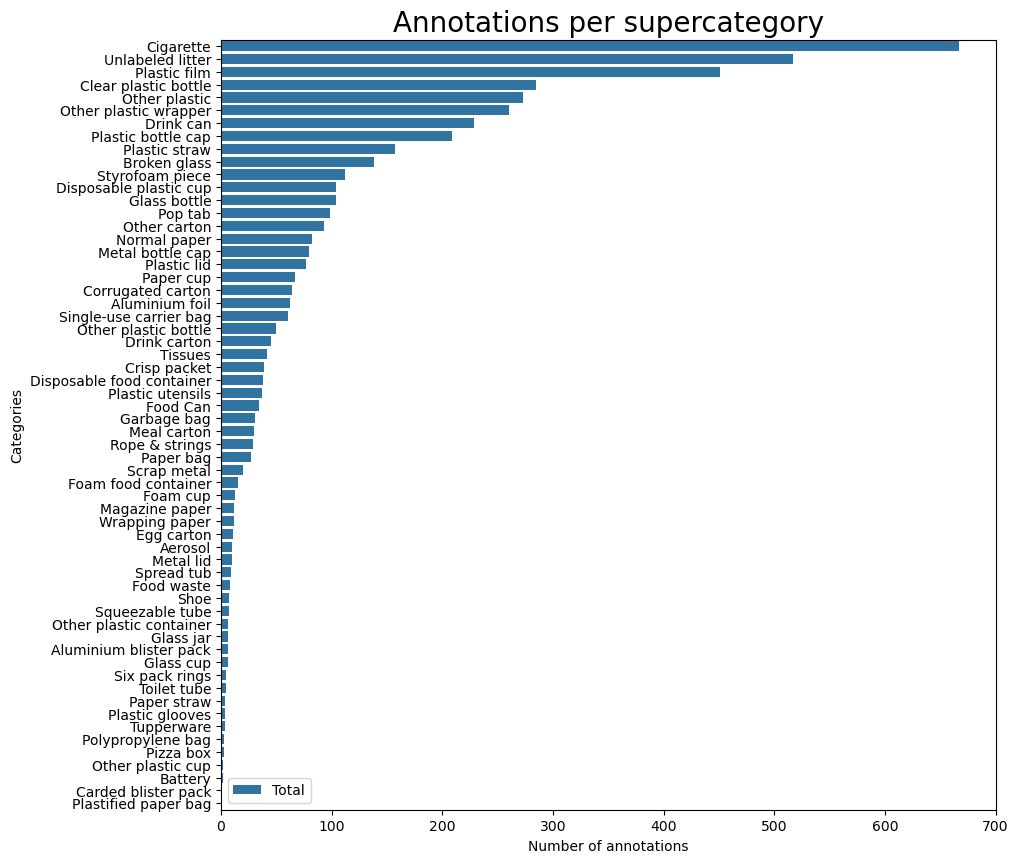

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10,10)) #reshape fig size so that labels don't overlap
df_categories.sort_values(by='Number of annotations', axis=0, ascending=False, inplace=True) #sort values in descending order for dataviz
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df_categories, label="Total")
plot_1.set_title('Annotations per supercategory',fontsize=20) 
plot_1

Text(0.5, 1.0, 'Annotations per supercategory')

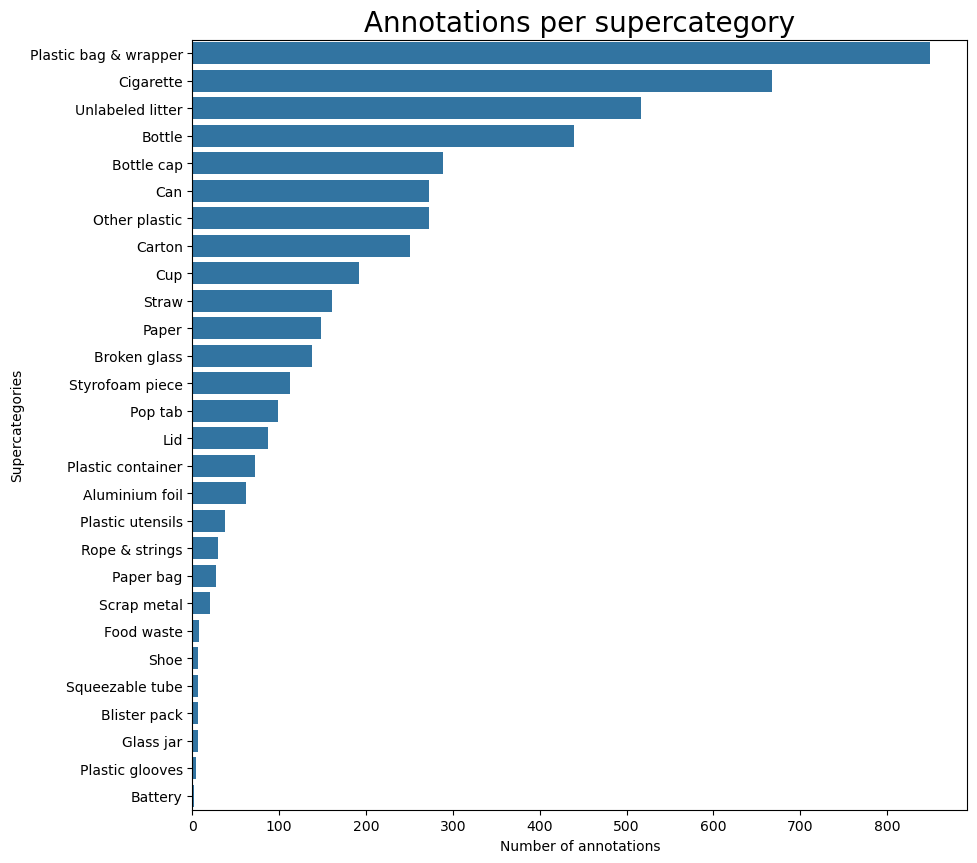

In [15]:
# Vizualise repartition of annotations in supercategories
f, ax = plt.subplots(figsize=(10,10))

df_supercategories.sort_values(by='Number of annotations', axis=0, ascending=False, inplace=True)

plot_2 = sns.barplot(x="Number of annotations", y="Supercategories", data=df_supercategories)
plot_2.set_title('Annotations per supercategory',fontsize=20)   

In [19]:
dataset['annotations']

[{'id': 1,
  'image_id': 0,
  'category_id': 6,
  'segmentation': [[561.0,
    1238.0,
    568.0,
    1201.0,
    567.0,
    1175.0,
    549.0,
    1127.0,
    538.0,
    1089.0,
    519.0,
    1043.0,
    517.0,
    1005.0,
    523.0,
    964.0,
    529.0,
    945.0,
    520.0,
    896.0,
    525.0,
    862.0,
    536.0,
    821.0,
    554.0,
    769.0,
    577.0,
    727.0,
    595.0,
    678.0,
    596.0,
    585.0,
    588.0,
    346.0,
    581.0,
    328.0,
    569.0,
    306.0,
    570.0,
    276.0,
    576.0,
    224.0,
    560.0,
    205.0,
    564.0,
    170.0,
    578.0,
    154.0,
    608.0,
    136.0,
    649.0,
    127.0,
    688.0,
    127.0,
    726.0,
    129.0,
    759.0,
    141.0,
    784.0,
    153.0,
    792.0,
    177.0,
    788.0,
    193.0,
    782.0,
    209.0,
    792.0,
    238.0,
    802.0,
    271.0,
    802.0,
    294.0,
    791.0,
    319.0,
    789.0,
    360.0,
    794.0,
    395.0,
    810.0,
    529.0,
    819.0,
    609.0,
    841.0,
    675.0,
    8